In [1]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

/Users/vikkunair/.local/share/virtualenvs/Contract_Obligation_Tests-5AjLZ1i5/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model = AutoModelForQuestionAnswering.from_pretrained('./cuad-models/roberta-base/')
tokenizer = AutoTokenizer.from_pretrained('./cuad-models/roberta-base/', use_fast=False)

In [5]:
import json

with open('./cuad-data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [6]:
question = data['data'][0]['paragraphs'][0]['qas'][2]['question']
paragraph = ' '.join(data['data'][0]['paragraphs'][0]['context'].split()[:100])

In [19]:
print(question)

Highlight the parts (if any) of this contract related to "Agreement Date" that should be reviewed by a lawyer. Details: The date of the contract


In [20]:
print(paragraph)

EXHIBIT 10.6 DISTRIBUTOR AGREEMENT THIS DISTRIBUTOR AGREEMENT (the "Agreement") is made by and between Electric City Corp., a Delaware corporation ("Company") and Electric City of Illinois LLC ("Distributor") this 7th day of September, 1999. RECITALS A. The Company's Business. The Company is presently engaged in the business of selling an energy efficiency device, which is referred to as an "Energy Saver" which may be improved or otherwise changed from its present composition (the "Products"). The Company may engage in the business of selling other products or other devices other than the Products, which will be considered Products if Distributor exercises


In [7]:
encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)
inputs = encoding['input_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)
outputs = model(input_ids=torch.tensor([inputs]))

start_scores = outputs.start_logits
end_scores = outputs.end_logits

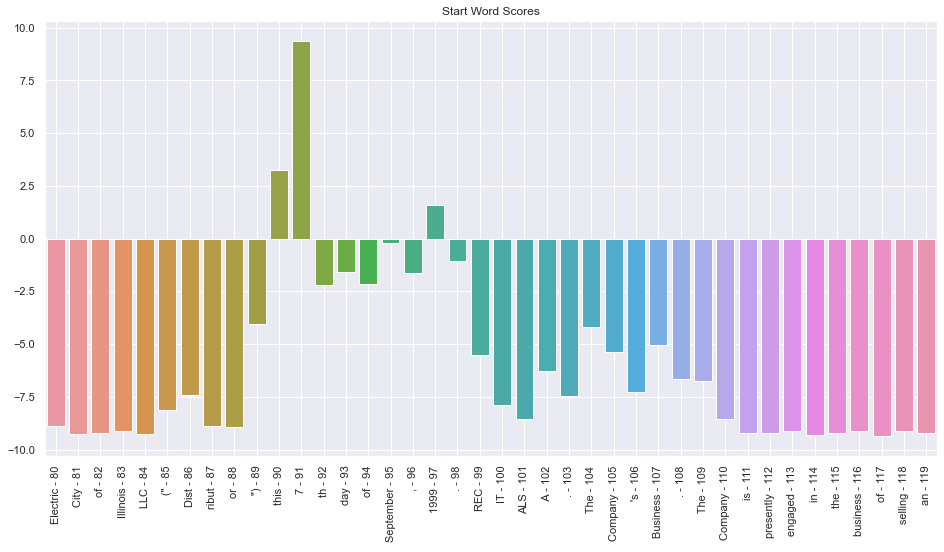

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(tokenizer.convert_tokens_to_string(token), i))

# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels[80:120], y=s_scores[80:120], ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

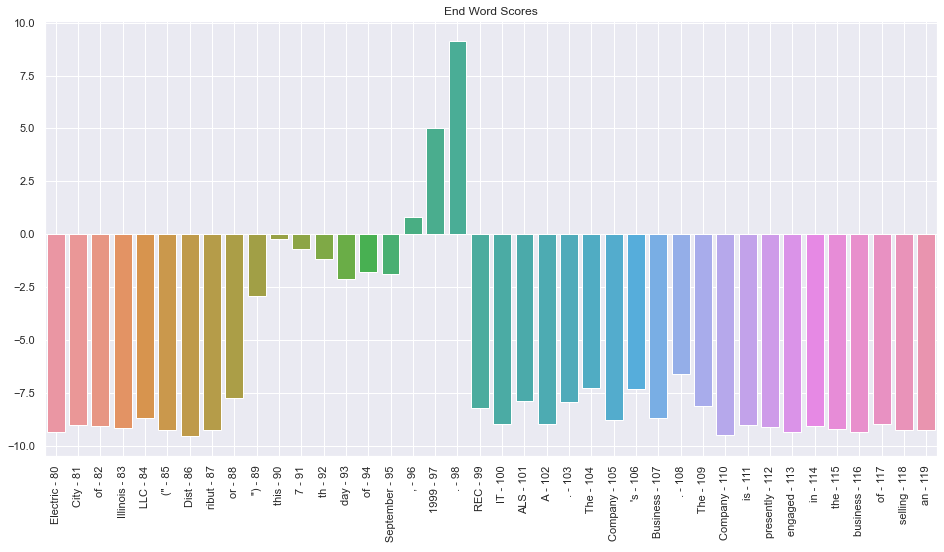

In [11]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels[80:120], y=e_scores[80:120], ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

In [12]:
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer = tokenizer.convert_tokens_to_string(tokens[start_index:end_index+1])
answer.strip()

'7th day of September, 1999.'

In [24]:
question = data['data'][0]['paragraphs'][0]['qas'][4]['question']
paragraph = ' '.join(data['data'][0]['paragraphs'][0]['context'].split()[:100])

In [26]:
question

'Highlight the parts (if any) of this contract related to "Expiration Date" that should be reviewed by a lawyer. Details: On what date will the contract\'s initial term expire?'

In [29]:
data['data'][2]['paragraphs'][0]

{'qas': [{'answers': [{'text': 'SUPPLY CONTRACT', 'answer_start': 14}],
   'id': 'LohaCompanyltd_20191209_F-1_EX-10.16_11917878_EX-10.16_Supply Agreement__Document Name',
   'question': 'Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract',
   'is_impossible': False},
  {'answers': [{'text': 'The seller:', 'answer_start': 143},
    {'text': 'The buyer/End-User: Shenzhen LOHAS Supply Chain Management Co., Ltd.',
     'answer_start': 49}],
   'id': 'LohaCompanyltd_20191209_F-1_EX-10.16_11917878_EX-10.16_Supply Agreement__Parties',
   'question': 'Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract',
   'is_impossible': False},
  {'answers': [],
   'id': 'LohaCompanyltd_20191209_F-1_EX-10.16_11917878_EX-10.16_Supply Agreement__Agreement Date',
   'question': 'Highlight the parts (if any) of 